## Differential Rotation 

The parameters that will be used in each epoch are:

|           Parameter   | 2004       |  2005     |
|              :---:    | :---:      | :---:     |
|$K$ (km/s)             | $149.11$    | $149.4$   |  
|$v_\mathrm{rad}$ (km/s)| $34.57$     | $35.0$    |
|$\phi$                 | $-0.00258$  | $-0.0041$ | 
| $i$                   | $80$       | $80$      |
|$v\sin(i)$ (km/s)      | $89.7$     |  $90.1$   |
| EQW                   | $5.12$     | $5.12$    |


### DATA IN 2004  

In [107]:
# load modules
import numpy as N
import matplotlib.pyplot as P
from scipy.optimize import leastsq
import cmocean as cm
import matplotlib.font_manager

# Read file with informations in each run
beta, gamma, chisq, s, sp_ph, test, cool, hot = N.genfromtxt('data/search1_dr_i_chipot_2004.txt', unpack=True)

# Set global min of chisq
vmin = chisq.min()

#select data within the conditions:
isp = N.bitwise_and(N.bitwise_and(sp_ph <= 0.14005, sp_ph >= 0.13995), test <=0.005)
beta = beta[isp]; gamma = gamma[isp]; chisq = chisq[isp]; s = s[isp]; sp_ph = sp_ph[isp] 
test = test[isp]; cool = cool[isp]; hot = hot[isp]
#we also add another condition for the data (optional):
level = 1.05
ic = N.bitwise_and(chisq >= 1.00*vmin, chisq <= level*vmin)
beta = beta[ic]; gamma = gamma[ic]; chisq = chisq[ic]; s = s[ic]; sp_ph = sp_ph[ic] 
test = test[ic]; cool = cool[ic]; hot = hot[ic]

# Set max chisq
vmax = chisq.max()

# Create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(N.unique(beta), N.unique(gamma))
m_z = N.ones_like(x)*9999.

for i in range(sp_ph.shape[0]):
    indx = N.bitwise_and(x == beta[i], y == gamma[i])
    m_z[indx] = chisq[i]
    
mask = m_z > level*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*beta**2 + x[1]*beta + x[2]*gamma**2 + x[3]*gamma \
                            + x[4]*beta*gamma + x[5] - chisq
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
dx = 1./N.sqrt(a - e**2/(4*c))
dy = 1./N.sqrt(c - e**2/(4*a))
# Now we need to find the number of points to find the error bar
cycle, vr, snI, I, cycleV, vrV, snV, V = rstokes('data/v471tau_04.ss_search1_3d')
count=0
for i in range(len(cycle)):
    count += I[i].shape[0]
dx /= N.sqrt(count)
dy /= N.sqrt(count)
print('Position of the center on this plane:')
print('beta = %6.4f and gamma = %6.4f' %(best_x, best_y))
period =  0.5211833875 # in days
Omega0 = 2*N.pi/period
print(r'Omega_EQ = %4.3f and dO = %4.3f' %((1-best_x)*Omega0, best_y*Omega0))
print(r'dO_EQ = %4.3f and ddO = %4.3f' %((dx)*Omega0, dy*Omega0))
print(Omega0)

Position of the center on this plane:
beta = -0.0039 and gamma = 0.0077
Omega_EQ = 12.103 and dO = 0.093
dO_EQ = 0.002 and ddO = 0.009
12.055613163954858


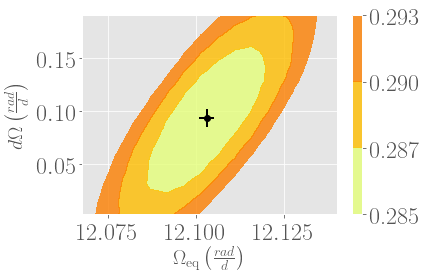

In [109]:
cmap = plt.get_cmap('Wistia', 3)
P.rcParams['font.family'] = 'arial'
# with stokes-I
Oeq = (1 - x)*Omega0
dO = y*Omega0
v1 = [1.0*vmin,1.01*vmin,1.02*vmin,1.03*vmin] # levels to plot
P.contourf(Oeq, dO, z, levels=v1, cmap=cmap, alpha=0.8)
cmb = P.colorbar()
cmb.ax.set_yticklabels(["{:1.3f}".format(i) for i in v1])
#P.contour(Oeq, dO, z, 5, colors='g', alpha=0.2)#, levels = N.linspace(vmin, vmax, 8), cmap=cmap)
P.plot(Omega0, 0.05, 'x', color='k')
P.errorbar((1-best_x)*Omega0, best_y*Omega0, xerr=(dx)*Omega0, yerr=(dy)*Omega0, fmt='-o', color='k')
P.xlim((Oeq.min(), Oeq.max()))
P.ylim((dO.min(), dO.max()))
P.xlabel(r'$\Omega_\mathrm{eq} \left(\frac{rad}{d}\right)$', fontsize=20)
P.ylabel(r'$d\Omega \left(\frac{rad}{d}\right)$', fontsize=20)
P.tight_layout()

In [110]:
# Read file with informations in each run
beta_v, gamma_v, chisq_v, s_v, bmod, test_v = N.genfromtxt('data/search1_dr_v_chipot_2004.txt', unpack=True)

# Set global min of chisq
vmin_v = chisq_v.min()

#select data within the conditions:
isp = N.bitwise_and(N.bitwise_and(bmod <= 175.005, bmod >= 171.995), test_v <=0.005)
beta_v = beta_v[isp]; gamma_v = gamma_v[isp]; chisq_v = chisq_v[isp]; s_v = s_v[isp]; bmod = bmod[isp] 
test_v = test_v[isp]
#we also add another condition for the data (optional):
level = 50.
isp = N.bitwise_and(bmod >= 1.00*vmin_v, bmod <= level*vmin_v)
beta_v = beta_v[isp]; gamma_v = gamma_v[isp]; chisq_v = chisq_v[isp]; s_v = s_v[isp]; bmod = bmod[isp] 
test_v = test_v[isp]

# Set max chisq
vmax_v = chisq_v.max()

# Create a mesh and create new matrix with mesh's shape
x_v, y_v = N.meshgrid(N.unique(beta_v), N.unique(gamma_v))
m_z_v = N.ones_like(x_v)*9999.

for i in range(bmod.shape[0]):
    indx = N.bitwise_and(x_v == beta_v[i], y_v == gamma_v[i])
    m_z_v[indx] = chisq_v[i]
    
mask_v = m_z_v > level*vmin_v
z_v=N.ma.array(m_z_v, mask=mask_v)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*beta_v**2 + x[1]*beta_v + x[2]*gamma_v**2 + x[3]*gamma_v \
                            + x[4]*beta_v*gamma_v + x[5] - chisq
coef_v = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef_v.copy()
best_x_v = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y_v = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Position of the center on this plane:')
print('beta = %6.4f and gamma = %6.4f' %(best_x_v, best_y_v))
print(r'Omega_EQ = %4.3f and dO = %4.3f' %((1-best_x_v)*Omega0, best_y_v*Omega0))

ValueError: zero-size array to reduction operation maximum which has no identity

In [7]:
period =  0.521183398 # in days
Omega0 = 2*N.pi/period


In [8]:
Omega0

12.055612921076941

In [9]:
0.091-0.056


0.034999999999999996

In [10]:
12.102-12.089

0.0129999999999999

In [11]:
0.013/0.035

0.3714285714285714